In [419]:
import pandas as pd
import polars as pl
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold
import matplotlib.pyplot as plt
from scipy.special import expit
from pymer4.models import Lmer

In [98]:
# Load black for formatting
import jupyter_black

jupyter_black.load()
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

## Read data and select variables

In [383]:
df = pd.read_parquet("../../data/runs/run_folder_2024-03-22_15.04/model_data.parquet")
df.head()

,SS,SSB,SSBS,Max_scaled_abundance_sqrt,Intercept,Primary vegetation_Light use,Primary vegetation_Intense use,Secondary vegetation_Minimal use,Secondary vegetation_Light use,Secondary vegetation_Intense use,Cropland_Minimal use,Cropland_Light_Intense,Pasture_Minimal use,Pasture_Light_Intense,Urban_All uses,Pop_density_1km_log,Road_density_50km_cbrt,Mean_pop_density_1km_log,Primary vegetation_Light use x Pop_density_1km_log,Primary vegetation_Intense use x Pop_density_1km_log,Secondary vegetation_Minimal use x Pop_density_1km_log,Secondary vegetation_Light use x Pop_density_1km_log,Secondary vegetation_Intense use x Pop_density_1km_log,Cropland_Minimal use x Pop_density_1km_log,Cropland_Light_Intense x Pop_density_1km_log,Pasture_Minimal use x Pop_density_1km_log,Pasture_Light_Intense x Pop_density_1km_log,Urban_All uses x Pop_density_1km_log,Primary vegetation_Light use x Road_density_50km_cbrt,Primary vegetation_Intense use x Road_density_50km_cbrt,Secondary vegetation_Minimal use x Road_density_50km_cbrt,Secondary vegetation_Light use x Road_density_50km_cbrt,Secondary vegetation_Intense use x Road_density_50km_cbrt,Cropland_Minimal use x Road_density_50km_cbrt,Cropland_Light_Intense x Road_density_50km_cbrt,Pasture_Minimal use x Road_density_50km_cbrt,Pasture_Light_Intense x Road_density_50km_cbrt,Urban_All uses x Road_density_50km_cbrt
0,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1,AD1_2002__Tonhasca 1 5,0.674499,1,0,0,0,0,1,0,0,0,0,0,-0.205775,-0.898953,-1.440705,-0.000000,-0.0,-0.0,-0.0,-0.205775,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.898953,-0.0,-0.0,-0.0,-0.0,-0.0
1,AD1_2009__Vergara 1,AD1_2009__Vergara 1,AD1_2009__Vergara 1 15,0.902194,1,0,0,0,0,1,0,0,0,0,0,1.573487,-0.424551,0.975725,0.000000,0.0,0.0,0.0,1.573487,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.0,-0.0,-0.0,-0.424551,-0.0,-0.0,-0.0,-0.0,-0.0
2,AD1_2013__Grass 1,AD1_2013__Grass 1,AD1_2013__Grass 1 10,0.492175,1,0,0,0,0,0,0,0,0,0,0,-0.842682,0.166074,-0.973692,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,AD1_2013__Grass 1,AD1_2013__Grass 1,AD1_2013__Grass 1 12,0.764101,1,0,0,0,0,0,0,0,0,0,0,-0.770763,0.156382,-0.973692,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,AD1_2013__Grass 2,AD1_2013__Grass 2,AD1_2013__Grass 2 1,0.202640,1,1,0,0,0,0,0,0,0,0,0,-1.027548,0.301278,-0.973692,-1.027548,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,0.301278,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [264]:
df.shape

(7717, 39)

In [384]:
y = df["Max_scaled_abundance_sqrt"]
x = df.drop(
    [
        "SS",
        "SSB",
        "SSBS",
        # "Kingdom",
        "Max_scaled_abundance_sqrt",
    ],
    axis="columns",
)
groups = df["SS", "SSB"]

## Pymer4 package

In [423]:

df.columns = df.columns.str.replace(" ", "_")

Index(['SS', 'SSB', 'SSBS', 'Max_scaled_abundance_sqrt', 'Intercept',
       'Primary_vegetation_Light_use', 'Primary_vegetation_Intense_use',
       'Secondary_vegetation_Minimal_use', 'Secondary_vegetation_Light_use',
       'Secondary_vegetation_Intense_use', 'Cropland_Minimal_use',
       'Cropland_Light_Intense', 'Pasture_Minimal_use',
       'Pasture_Light_Intense', 'Urban_All_uses', 'Pop_density_1km_log',
       'Road_density_50km_cbrt', 'Mean_pop_density_1km_log',
       'Primary_vegetation_Light_use_x_Pop_density_1km_log',
       'Primary_vegetation_Intense_use_x_Pop_density_1km_log',
       'Secondary_vegetation_Minimal_use_x_Pop_density_1km_log',
       'Secondary_vegetation_Light_use_x_Pop_density_1km_log',
       'Secondary_vegetation_Intense_use_x_Pop_density_1km_log',
       'Cropland_Minimal_use_x_Pop_density_1km_log',
       'Cropland_Light_Intense_x_Pop_density_1km_log',
       'Pasture_Minimal_use_x_Pop_density_1km_log',
       'Pasture_Light_Intense_x_Pop_density_1k

In [427]:
var_col_names = [
    col
    for col in df.columns
    if col not in ["SS", "SSB", "SSBS", "Max_scaled_abundance_sqrt"]
]

In [432]:
formula = f"Max_scaled_abundance_sqrt ~ {' + '.join(var_col_names)} + (1|SS) + (1|SSB)"
model = Lmer(formula, data=df)
fit_model = model.fit()
print(fit_model)

Linear mixed model fit by REML [’lmerMod’]
Formula: Max_scaled_abundance_sqrt~Intercept+Primary_vegetation_Light_use+Primary_vegetation_Intense_use+Secondary_vegetation_Minimal_use+Secondary_vegetation_Light_use+Secondary_vegetation_Intense_use+Cropland_Minimal_use+Cropland_Light_Intense+Pasture_Minimal_use+Pasture_Light_Intense+Urban_All_uses+Pop_density_1km_log+Road_density_50km_cbrt+Mean_pop_density_1km_log+Primary_vegetation_Light_use_x_Pop_density_1km_log+Primary_vegetation_Intense_use_x_Pop_density_1km_log+Secondary_vegetation_Minimal_use_x_Pop_density_1km_log+Secondary_vegetation_Light_use_x_Pop_density_1km_log+Secondary_vegetation_Intense_use_x_Pop_density_1km_log+Cropland_Minimal_use_x_Pop_density_1km_log+Cropland_Light_Intense_x_Pop_density_1km_log+Pasture_Minimal_use_x_Pop_density_1km_log+Pasture_Light_Intense_x_Pop_density_1km_log+Urban_All_uses_x_Pop_density_1km_log+Primary_vegetation_Light_use_x_Road_density_50km_cbrt+Primary_vegetation_Intense_use_x_Road_density_50km_cbr

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


## Model training and prediction

In [385]:
def fit_lme_model(x, y, groups):
    model = sm.regression.mixed_linear_model.MixedLM(
        endog=y,
        exog=x,
        groups=groups,
    )
    lme_fit = lme.fit()

    return lme_fit

In [386]:
model = fit_lme_model(x, y, groups)
print(model.summary())

                               Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          Max_scaled_abundance_sqrt
No. Observations:            7732             Method:                      REML                     
No. Groups:                  774              Scale:                       0.0277                   
Min. group size:             1                Log-Likelihood:              2003.1556                
Max. group size:             360              Converged:                   Yes                      
Mean group size:             10.0                                                                   
----------------------------------------------------------------------------------------------------
                                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept             

In [387]:
def predict_with_random_and_fixed_effects(
    model,
    x_fe: pd.DataFrame,
    x_re: pd.DataFrame,
    groups: pd.Series,
    y: pd.Series,
) -> tuple[pd.DataFrame]:
    """
    The standard predict method in statsmodels only accounts for the FE and
    ignores the group intercepts and slopes. This function combines FE and RE to
    make predictions on group level. For each group, we first make a prediction
    using the FE. We then extract the RE from the model, make a second prediction
    and add these together.

    Args:
        model: The trained model object.
        x_fe: Array with FE design matrix data (train or test).
        x_re: Array with RE design matrix data (train or test).
        groups: List of block ids to make predictions for.
        y: Array with true y values (train or test).

    Returns:
        df_pred: Dataframe with predictions and actual values for each block.
    """
    group_preds = []

    # Extract random effects from model
    df_re = pd.DataFrame.from_dict(model.random_effects, orient="index")

    for group in groups.unique():
        # Filter the data for the specific group
        group_mask = (groups == group).to_numpy()
        x_fe_group = x_fe[group_mask]

        # Get fixed effects predictions for the group
        fe_pred = model.predict(x_fe_group)

        # Get random effects predictions for the group
        re_params = np.array(df_re.loc[group])
        if x_re is not None:  # If slopes are included, calculate linear sum
            x_re_group = x_re[group_mask]
            re_pred = x_re_group.to_numpy() @ re_params
        else:  # Otherwise, the prediction is just the intercept
            re_pred = re_params[0]

        # Combine fixed and random effects predictions
        total_pred = fe_pred + re_pred

        # Create a dataframe with group ID, predictions, and actual values
        df_group_pred = pd.DataFrame(
            {
                "Group": group,
                "Pred": total_pred,
                "Pred_FE": fe_pred,
                "Actual": y[group_mask],
            }
        )
        group_preds.append(df_group_pred)

    df_pred = pd.concat(group_preds, ignore_index=True)

    return df_pred

In [388]:
df_pred = predict_with_random_and_fixed_effects(
    model=lme_fit, x_fe=x, x_re=None, groups=groups, y=y
)

In [369]:
def inverse_transform_response(y: np.array, method: str) -> np.array:
    """Add docstring."""
    if method == "logit":
        res = expit(y)
    elif method == "sqrt":
        res = np.square(y)
    else:
        res = y

    return res

In [389]:
y_true = inverse_transform_response(df_pred["Actual"], "sqrt")
pred = inverse_transform_response(df_pred["Pred"], "sqrt")
pred_fe = inverse_transform_response(df_pred["Pred_FE"], "sqrt")

In [371]:
def plot_actual_pred(y_true, y_pred, group=None):
    r2 = r2_score(y_true, y_pred)

    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Observed")
    plt.ylabel("Predicted")
    plt.title("All groups: Observed vs predicted abundance")

    plt.plot(
        [min(y_true), max(y_true)],
        [min(y_true), max(y_true)],
        color="red",
        linestyle="--",
        linewidth=2,
    )
    plt.text(0.05, 0.95, f"R² = {r2:.3f}", fontsize=12, transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

### Training predictions with both FE and RE / conditional R^2

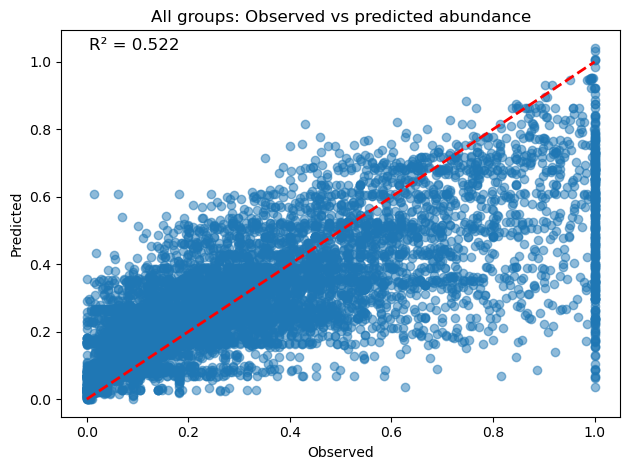

In [390]:
plot_actual_pred(y_true, pred)

### Training predictions with only FE / marginal R^2

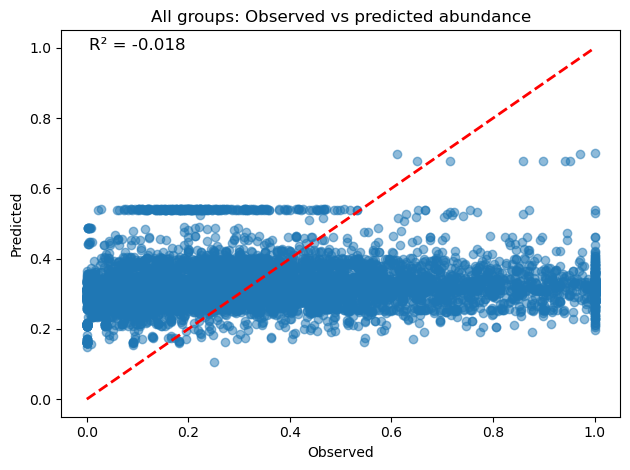

In [391]:
plot_actual_pred(y_true, pred_fe)

## Cross-validation

In [394]:
def create_stratification_column(
    df: pd.DataFrame, stratify_groups: list[str]
) -> pd.DataFrame:
    """
    Create a new column for stratification by concatenating the
    specified group columns.
    """

    if len(stratify_groups) > 1:
        df["Stratify_group"] = df[stratify_groups].astype(str).agg("_".join, axis=1)
    else:
        df["Stratify_group"] = df[stratify_groups[0]]

    return df

In [397]:
def generate_kfolds(
    df: pd.DataFrame,
    y_var: str,
    x_vars: list[str],
    groups: str,
    k: int = 5,
    stratify: bool = False,
) -> tuple[list[pl.DataFrame], list[pl.DataFrame], list[pl.Series], list[pl.Series]]:

    # Lists for storing the train and test datasets
    x_train_list = []
    x_test_list = []
    y_train_list = []
    y_test_list = []
    group_train_list = []
    group_test_list = []

    # Set up stratified k-fold sampler object and sample using the
    # stratify code (as the "y class label") for stratification
    if stratify:
        kfold = StratifiedKFold(n_splits=k, shuffle=True)
        strat_col = df.get_column("Stratify_group")
    else:
        kfold = KFold(n_splits=k, shuffle=True)
        strat_col = None

    for train_index, test_index in kfold.split(X=df, y=strat_col):
        x_train, x_test = df.iloc[train_index][x_vars], df.iloc[test_index][x_vars]
        y_train, y_test = df.iloc[train_index][y_var], df.iloc[test_index][y_var]
        group_train, group_test = (
            df.iloc[train_index][groups],
            df.iloc[test_index][groups],
        )

        # Store the data for this fold
        x_train_list.append(x_train)
        x_test_list.append(x_test)
        y_train_list.append(y_train)
        y_test_list.append(y_test)
        group_train_list.append(group_train)
        group_test_list.append(group_test)

    return (
        x_train_list,
        x_test_list,
        y_train_list,
        y_test_list,
        group_train_list,
        group_test_list,
    )

In [399]:
(
    x_train_list,
    x_test_list,
    y_train_list,
    y_test_list,
    group_train_list,
    group_test_list,
) = generate_kfolds(
    df,
    y_var=y.name,
    x_vars=x.columns,
    groups=groups.name,
    k=5,
    stratify=False,
)

In [418]:
def run_lme_cross_validation(
    x_train_list,
    x_test_list,
    y_train_list,
    y_test_list,
    group_train_list,
    group_test_list,
    response_transform: str,
):

    for i in range(len(x_train_list)):
        x_train, x_test = x_train_list[i], x_test_list[i]
        y_train, y_test = y_train_list[i], y_test_list[i]
        group_train, group_test = group_train_list[i], group_test_list[i]
        lme_fit = fit_lme_model(x=x_train, y=y_train, groups=group_train)

        df_pred_train = predict_with_random_and_fixed_effects(
            model=lme_fit, x_fe=x_train, x_re=None, groups=group_train, y=y_train
        )
        df_pred_test = predict_with_random_and_fixed_effects(
            model=lme_fit, x_fe=x_test, x_re=None, groups=group_test, y=y_test
        )
        y_true_train = inverse_transform_response(
            df_pred_train["Actual"], response_transform
        )
        pred_train = inverse_transform_response(
            df_pred_train["Pred"], response_transform
        )
        pred_fe_train = inverse_transform_response(
            df_pred_train["Pred_FE"], response_transform
        )
        cond_r2_train = r2_score(y_true_train, pred_train)
        marg_r2_train = r2_score(y_true_train, pred_fe_train)

        y_true_test = inverse_transform_response(
            df_pred_test["Actual"], response_transform
        )
        pred_test = inverse_transform_response(df_pred_test["Pred"], response_transform)
        pred_fe_test = inverse_transform_response(
            df_pred_test["Pred_FE"], response_transform
        )
        cond_r2_test = r2_score(y_true_test, pred_test)
        marg_r2_test = r2_score(y_true_test, pred_fe_test)

        print(f"Fold {i + 1} results:")
        print(
            f"Conditional R2: {round(cond_r2_train, 3)} (train) {round(cond_r2_test, 3)} (test)"
        )
        print(
            f"Marginal R2: {round(marg_r2_train, 3)} (train) {round(marg_r2_test, 3)} (test)\n"
        )

In [417]:
run_lme_cross_validation(
    x_train_list,
    x_test_list,
    y_train_list,
    y_test_list,
    group_train_list,
    group_test_list,
)

Fold 1 results:
Conditional R2: 0.525 (train) 0.511 (test)
Marginal R2: -0.015 (train) -0.029 (test)

Fold 2 results:
Conditional R2: 0.525 (train) 0.507 (test)
Marginal R2: -0.019 (train) -0.014 (test)

Fold 3 results:
Conditional R2: 0.514 (train) 0.553 (test)
Marginal R2: -0.018 (train) -0.017 (test)

Fold 4 results:
Conditional R2: 0.521 (train) 0.526 (test)
Marginal R2: -0.017 (train) -0.021 (test)

Fold 5 results:
Conditional R2: 0.525 (train) 0.509 (test)
Marginal R2: -0.02 (train) -0.01 (test)



## Unused code

In [ ]:
def stratified_validate_train_test_split(
    df: pl.DataFrame,
    y_var: str,
    X_vars: List[str],
    re_groups: List[str],
    test_size: float = 0.2,
) -> Tuple[pl.DataFrame, pl.DataFrame]:

    # Make a copy of the dataframe, and convert to pandas
    df = df.clone().to_pandas()

    # Perform the split with stratification based on the stratify_groups
    X_train_test, X_validate, y_train_test, y_validate = train_test_split(
        df[X_vars + re_groups + ["Stratify_group"]],
        df[y_var],
        test_size=test_size,
        stratify=df["Stratify_group"],
    )

    # Concatenate into two dataframes, one for train-test and one for validation
    df_train_test = pl.from_pandas(pd.concat(
        [y_train_test, X_train_test], axis="columns", ignore_index=True
    ))
    df_validate = pl.from_pandas(pd.concat([y_validate, X_validate])), axis="columns", ignore_index=True)

    return df_train_test, df_validate

In [ ]:
df_train_test, df_validate = stratified_validate_train_test_split(
    df_strat,
    y_var=y.name
    x_vars=["Pop_density_1km", "Road_density_50km"],
    re_groups=["SSB"],
    test_size=0.2,
)